In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox

autoreg_data = pd.read_excel("monthly-us-auto-registration-tho.xlsx")#, parse_dates=['Month'],keep_default_na=True)
dowjones_data = pd.read_csv("weekly-closings-of-the-dowjones-.csv")#,parse_dates=['Week'],keep_default_na=True)

def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

        
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
    
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

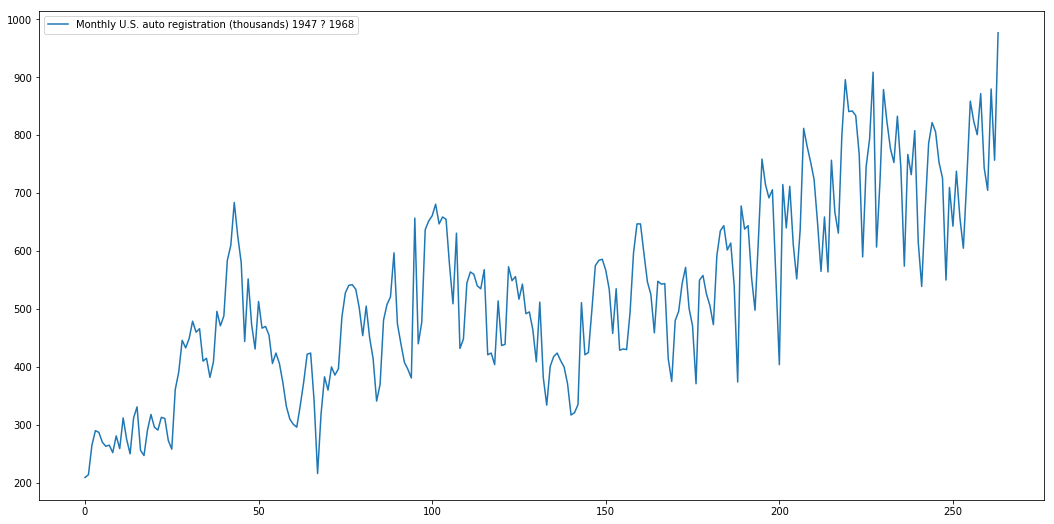

In [75]:
autoreg_data.plot(figsize=(18,9))

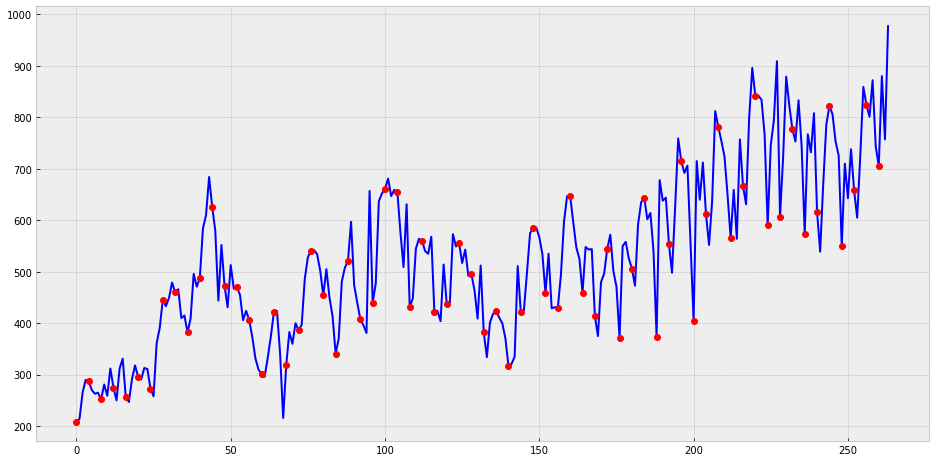

In [3]:
plot_ts_and_points(autoreg_data['Monthly U.S. auto registration (thousands) 1947 ? 1968'], 0, 4)

,Monthly U.S. auto registration (thousands) 1947 ? 1968
count,264.000000
mean,527.712121
std,162.997237
min,209.000000
25%,409.750000
50%,515.500000
75%,640.750000
max,977.000000


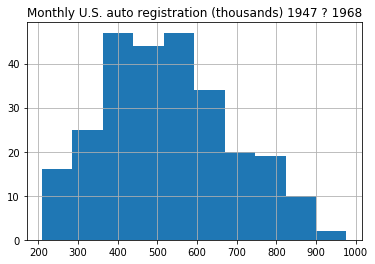

In [4]:
autoreg_data_d = autoreg_data.describe()
autoreg_data.hist()
autoreg_data_d

График имеет ярко выраженный тренд роста и признаки сезонности, что говорит о нестационарности ряда. Посмотрим на график автокорреляции

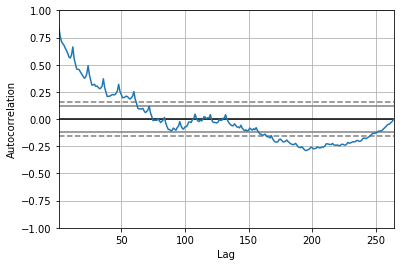

In [5]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(autoreg_data['Monthly U.S. auto registration (thousands) 1947 ? 1968'])
plt.show()

График уверенно движется вниз, что подтверждает гипотезу о нестационарности ряда

Results of Dickey-Fuller Test:
Test Statistic                  -1.225039
p-value                          0.662733
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


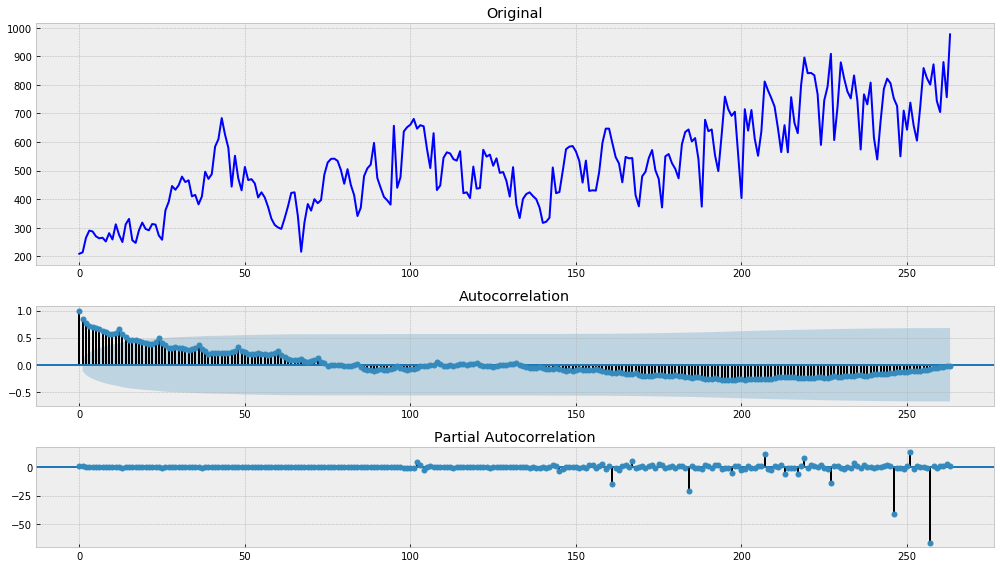

In [6]:
tsplot(autoreg_data['Monthly U.S. auto registration (thousands) 1947 ? 1968'])

Поведение ряда на графиках имеет признаки нестационарности. P-value также достаточно высокий для подтверждения гипотезы о нестационарности. Проведем дифференцирование и уменьшим дисперсию ряда

Results of Dickey-Fuller Test:
Test Statistic                  -1.941628
p-value                          0.312738
#Lags Used                      14.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


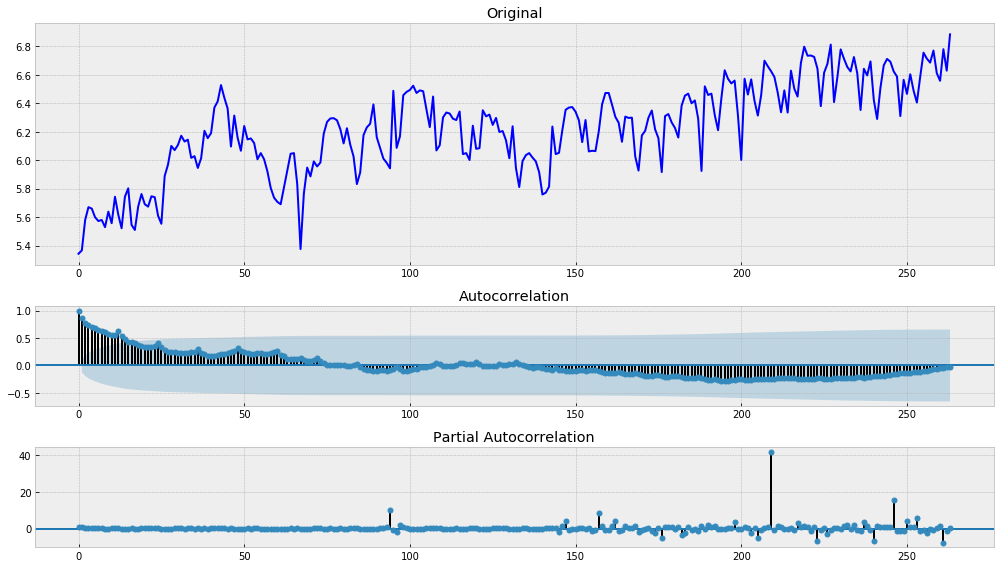

In [7]:
autoreg_data_disp = boxcox(autoreg_data['Monthly U.S. auto registration (thousands) 1947 ? 1968'], 0)
tsplot(autoreg_data_disp)

Results of Dickey-Fuller Test:
Test Statistic                  -4.362471
p-value                          0.000346
#Lags Used                      14.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


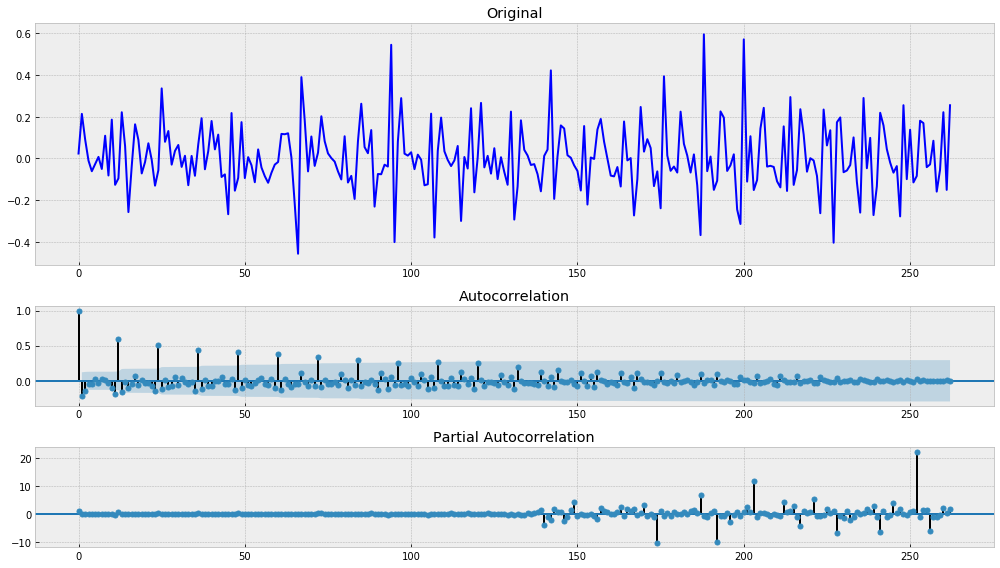

In [8]:
autoreg_data_disp_dif = autoreg_data_disp[1:] - autoreg_data_disp[:-1]
tsplot(autoreg_data_disp_dif)

p-value достаточно низкий для опровержения гипотезы о нестационарности ряда


# График №2

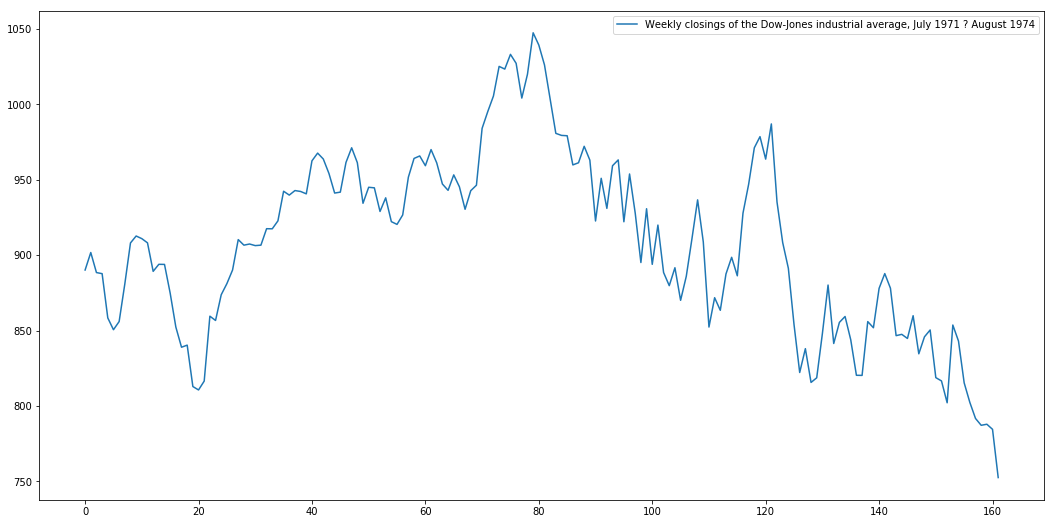

In [9]:
dowjones_data.plot(figsize=(18,9))

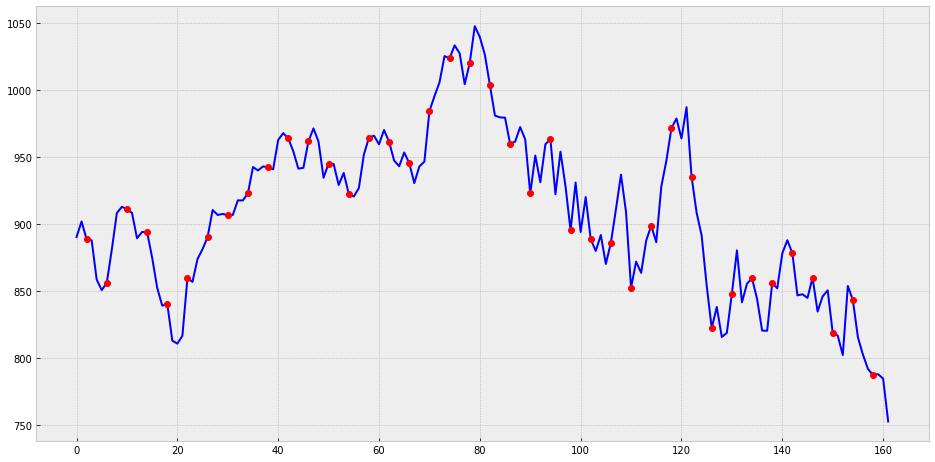

In [10]:
plot_ts_and_points(dowjones_data[dowjones_data.columns[1]], 2, 4)

,"Weekly closings of the Dow-Jones industrial average, July 1971 ? August 1974"
count,162.000000
mean,907.484753
std,60.599919
min,752.580000
25%,857.170000
50%,908.645000
75%,951.572500
max,1047.490000


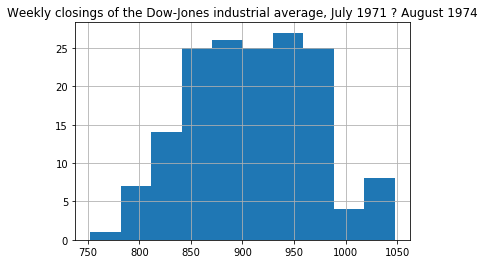

In [11]:
dowjones_data_d = dowjones_data.describe()
dowjones_data.hist()
dowjones_data_d

График не имеет ярко выраженных признаков сезонности или тренда. Гипотеза о стационарности ряда подлежит проверке. Посмотрим на график автокорреляции

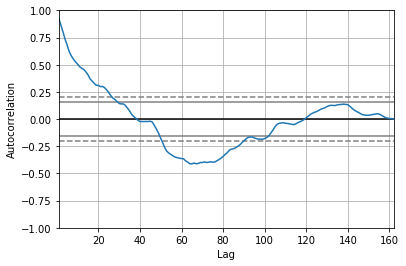

In [12]:
autocorrelation_plot(dowjones_data[dowjones_data.columns[1]])
plt.show()

График движется вниз по синусоиде. +1 к гипотезе о стационарности ряда

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


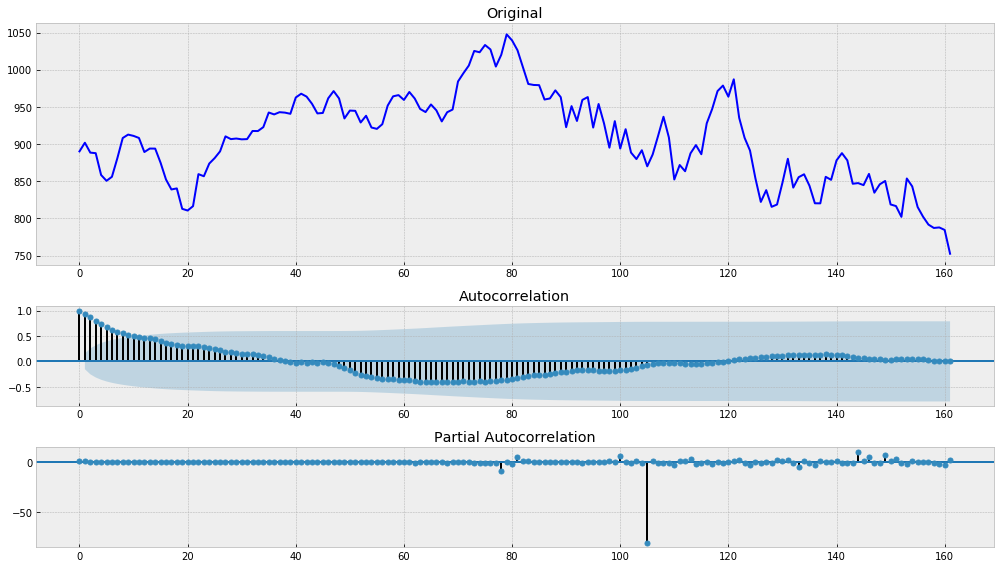

In [13]:
tsplot(dowjones_data[dowjones_data.columns[1]])

Поведение ряда на графиках имеет признаки стационарности. P-value же достаточно высокий для подтверждения гипотезы о стационарности. Проведем дифференцирование и уменьшим дисперсию ряда

Results of Dickey-Fuller Test:
Test Statistic                  -1.941628
p-value                          0.312738
#Lags Used                      14.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


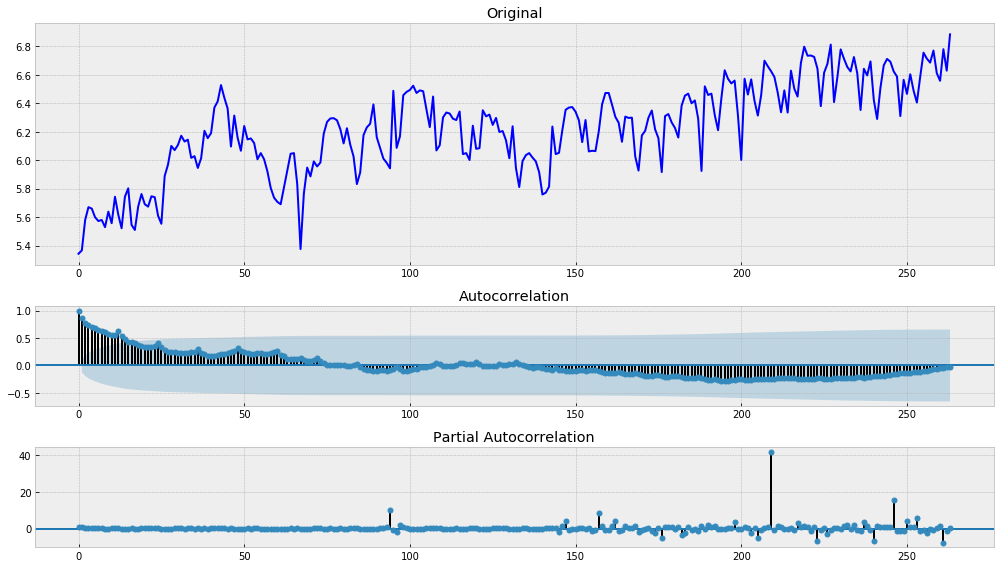

In [14]:
dowjones_data_disp = boxcox(dowjones_data[dowjones_data.columns[1]], 0)
tsplot(autoreg_data_disp)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


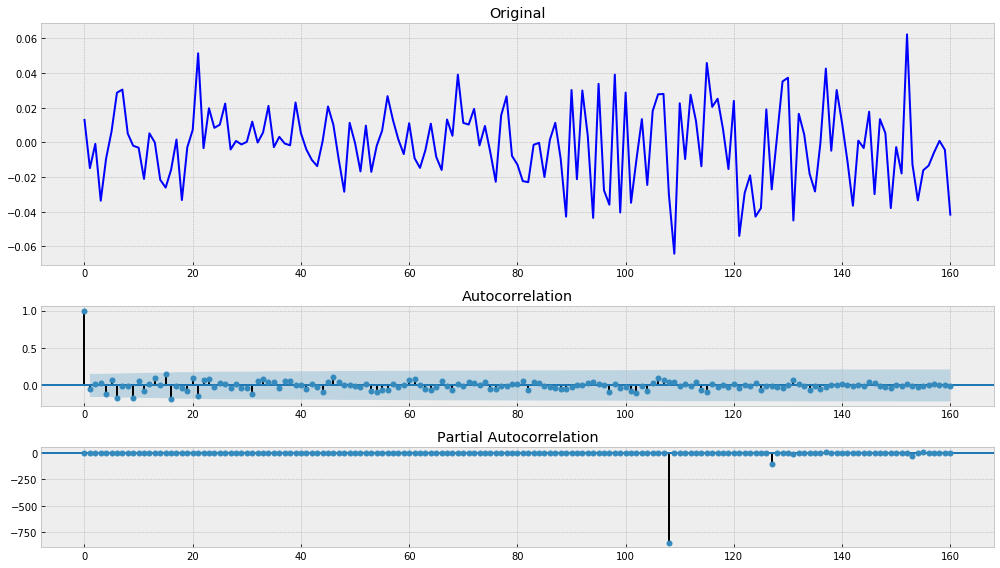

In [15]:
dowjones_data_disp_dif = dowjones_data_disp[1:] - dowjones_data_disp[:-1]
tsplot(dowjones_data_disp_dif)

p-value достаточно низкий для опровержения гипотезы о нестационарности ряда

# Домашнее задание №2. Элементарные алгоритмы обработки временных рядов

In [79]:
#Возьмем ряд с авторегистрациями
autoreg_data_nost = autoreg_data['Monthly U.S. auto registration (thousands) 1947 ? 1968']
autoreg_data_st = autoreg_data_disp_dif

with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(autoreg_data_nost, color='blue',label='original_autoreg')
    plt.legend()
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(autoreg_data_st, color='blue', linewidth='4', label='st_autoreg')
    plt.legend()

In [81]:
#Зададим функкции алгоритмов



        
def initial_trend(series, season_len):
    return sum([float(series[i + season_len] - series[i]) / season_len]) / season_len
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals
def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result
def plot_tema_nost(alpha, beta, gamma, ser=autoreg_data_nost, ser_to_plot=autoreg_data_nost, n_preds=24):
    tema = triple_exponential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser_to_plot, color='blue',label='original')
        plt.plot(tema, color='red', linewidth='4', label='TEMA_nost')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()
def plot_tema_st(alpha, beta, gamma, ser=autoreg_data_st, ser_to_plot=autoreg_data_st, n_preds=24):
    tema = triple_exponential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser_to_plot, color='blue',label='original')
        plt.plot(tema, color='red', linewidth='4', label='TEMA_st')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()

Средняя скользящая

In [90]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

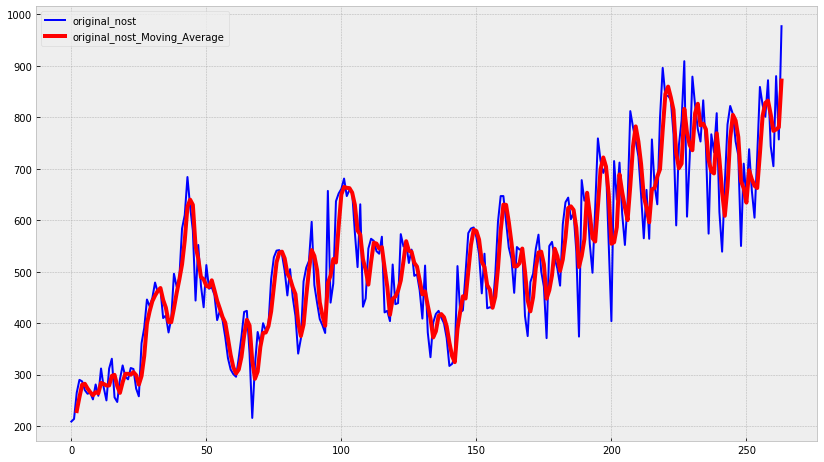

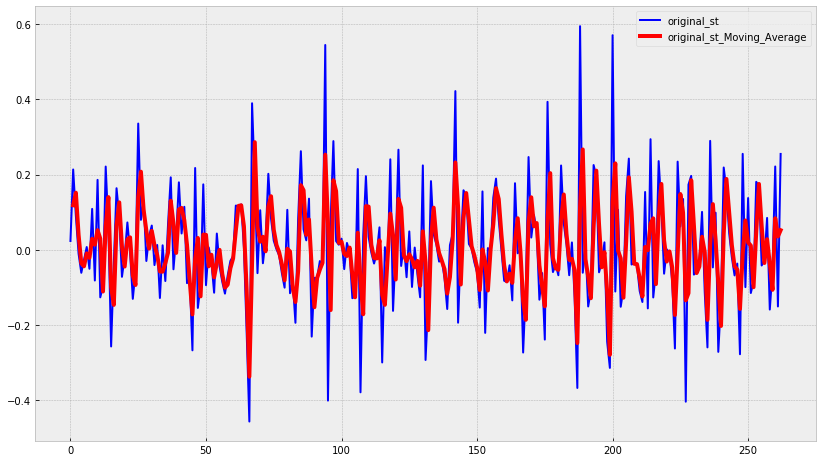

In [106]:
ma_1 = moving_average(autoreg_data_nost, 3)
ma_2 = moving_average(autoreg_data_st, 2)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(autoreg_data_nost, color='blue',label='original_nost')
    plt.plot(ma_1, color='red', linewidth='4', label='original_nost_Moving_Average')
    plt.legend()
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(autoreg_data_st, color='blue',label='original_st')
    plt.plot(ma_2, color='red', linewidth='4', label='original_st_Moving_Average')
    plt.legend()

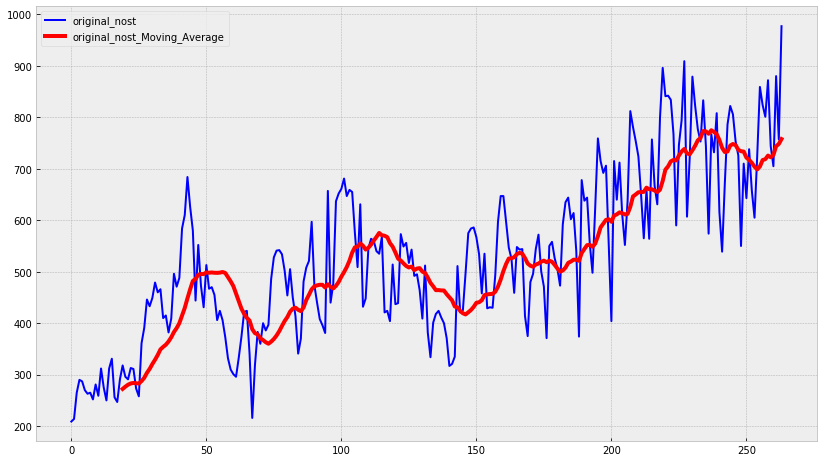

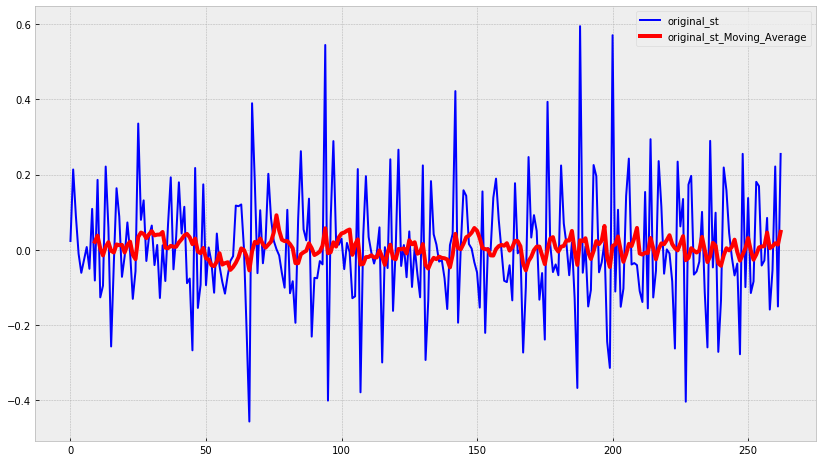

In [105]:
ma_1 = moving_average(autoreg_data_nost, 20)
ma_2 = moving_average(autoreg_data_st, 10)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(autoreg_data_nost, color='blue',label='original_nost')
    plt.plot(ma_1, color='red', linewidth='4', label='original_nost_Moving_Average')
    plt.legend()
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(autoreg_data_st, color='blue',label='original_st')
    plt.plot(ma_2, color='red', linewidth='4', label='original_st_Moving_Average')
    plt.legend()

Взвешенная скользящая средняя

In [108]:
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return pd.Series([np.NaN]).append(wma, ignore_index=True)

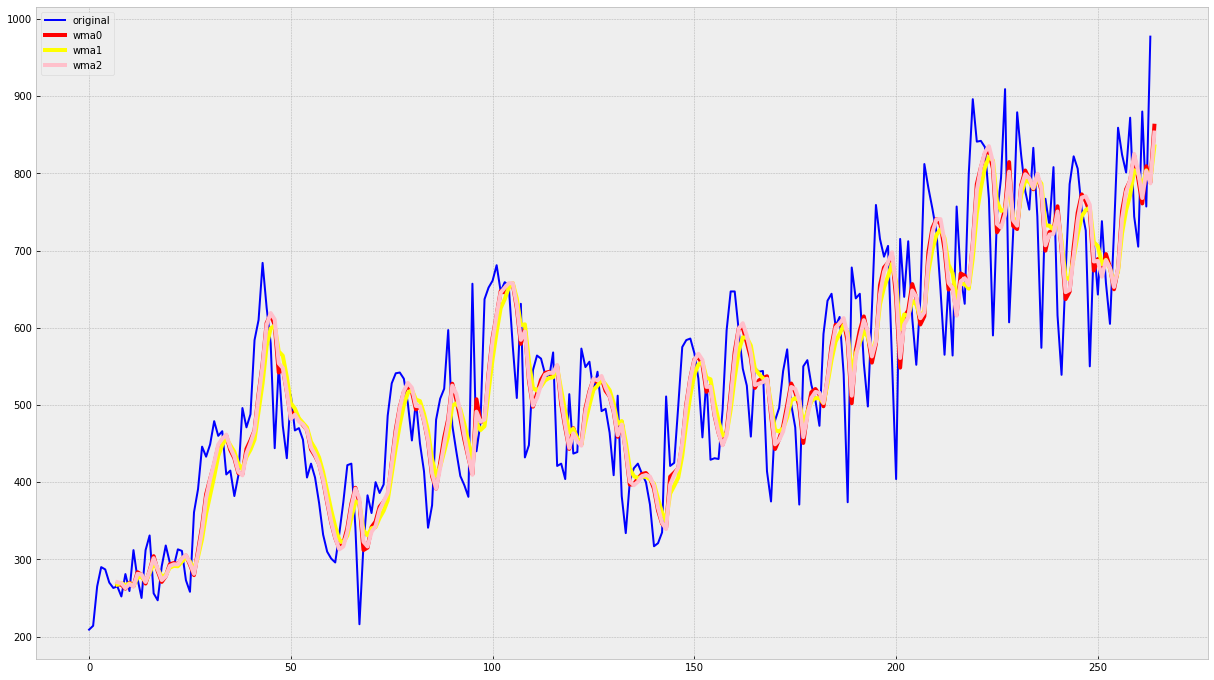

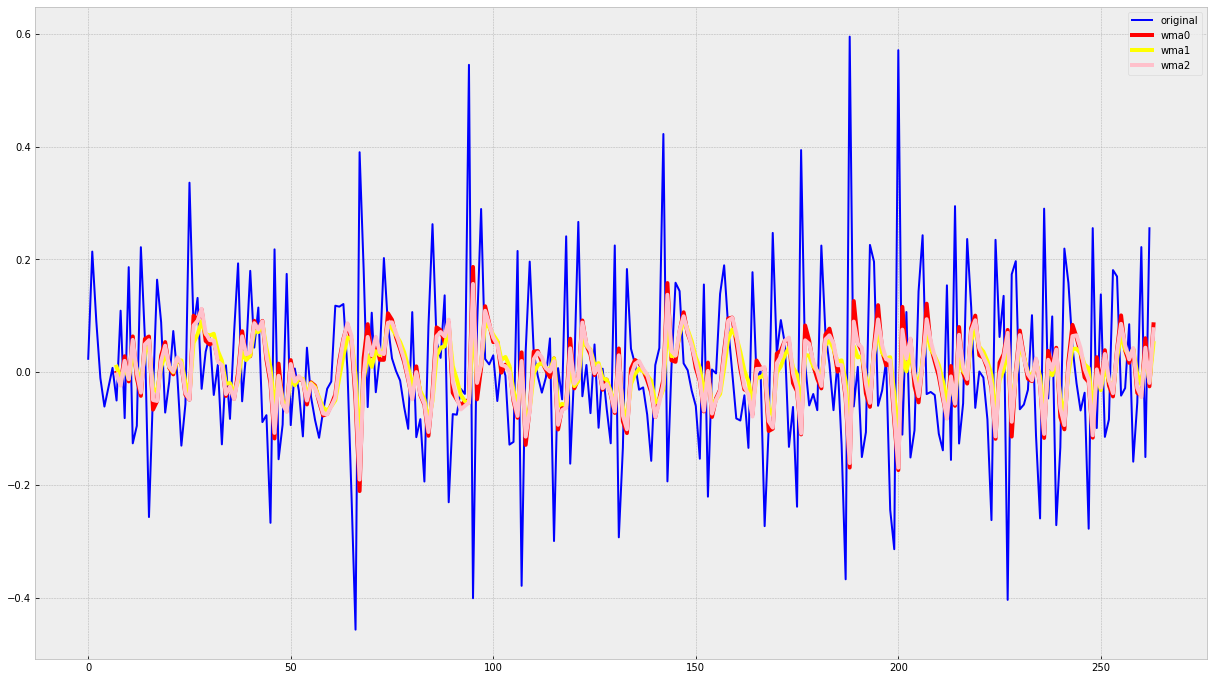

In [109]:
wma0_nost = weighted_moving_average(autoreg_data_nost, 7, [1,1,2,3,5,8,13])
wma1_nost = weighted_moving_average(autoreg_data_nost, 7, [1,2,3,4,5,6,7])
wma2_nost = weighted_moving_average(autoreg_data_nost, 7, [1, 4, 9, 16, 25, 36, 49])
wma0_st = weighted_moving_average(autoreg_data_st, 7, [1,1,2,3,5,8,13])
wma1_st = weighted_moving_average(autoreg_data_st, 7, [1,2,3,4,5,6,7])
wma2_st = weighted_moving_average(autoreg_data_st, 7, [1, 4, 9, 16, 25, 36, 49])
with plt.style.context('bmh'):
    plt.figure(figsize=(21, 12))
    plt.plot(autoreg_data_nost, color='blue',label='original')
    plt.plot(wma0_nost, color='red',linewidth='4',label='wma0')
    plt.plot(wma1_nost, color='yellow',linewidth='4',label='wma1')
    plt.plot(wma2_nost, color='pink',linewidth='4',label='wma2')
    plt.legend()
with plt.style.context('bmh'):
    plt.figure(figsize=(21, 12))
    plt.plot(autoreg_data_st, color='blue',label='original')
    plt.plot(wma0_st, color='red',linewidth='4',label='wma0')
    plt.plot(wma1_st, color='yellow',linewidth='4',label='wma1')
    plt.plot(wma2_st, color='pink',linewidth='4',label='wma2')
    plt.legend()

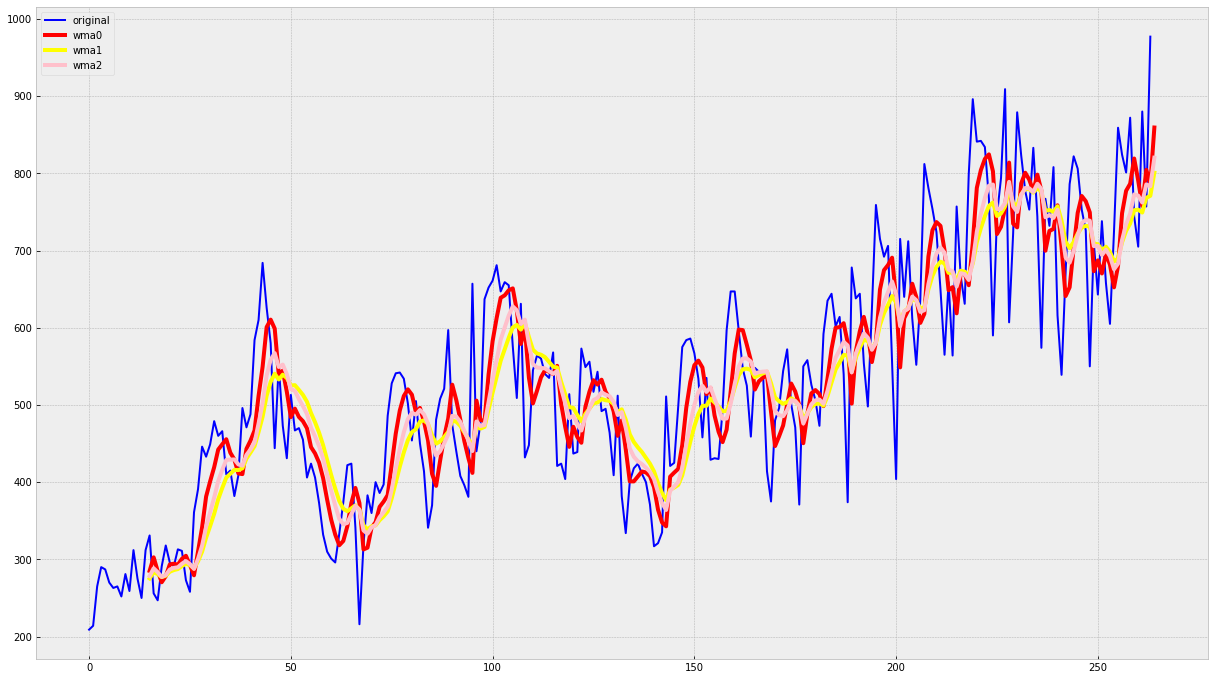

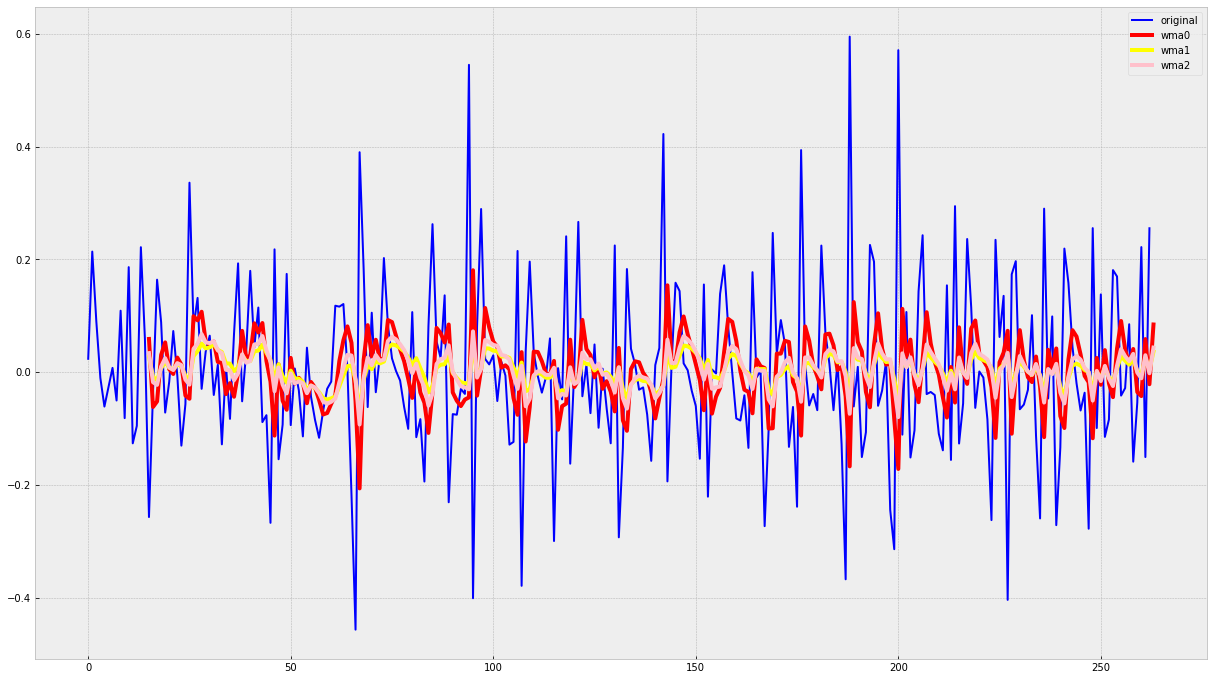

In [117]:
wma0_nost = weighted_moving_average(autoreg_data_nost, 15, [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610])
wma1_nost = weighted_moving_average(autoreg_data_nost, 15, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
wma2_nost = weighted_moving_average(autoreg_data_nost, 15, [1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225]
)
wma0_st = weighted_moving_average(autoreg_data_st, 15, [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610])
wma1_st = weighted_moving_average(autoreg_data_st, 15,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
wma2_st = weighted_moving_average(autoreg_data_st, 15, [1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225])
with plt.style.context('bmh'):
    plt.figure(figsize=(21, 12))
    plt.plot(autoreg_data_nost, color='blue',label='original')
    plt.plot(wma0_nost, color='red',linewidth='4',label='wma0')
    plt.plot(wma1_nost, color='yellow',linewidth='4',label='wma1')
    plt.plot(wma2_nost, color='pink',linewidth='4',label='wma2')
    plt.legend()
with plt.style.context('bmh'):
    plt.figure(figsize=(21, 12))
    plt.plot(autoreg_data_st, color='blue',label='original')
    plt.plot(wma0_st, color='red',linewidth='4',label='wma0')
    plt.plot(wma1_st, color='yellow',linewidth='4',label='wma1')
    plt.plot(wma2_st, color='pink',linewidth='4',label='wma2')
    plt.legend()

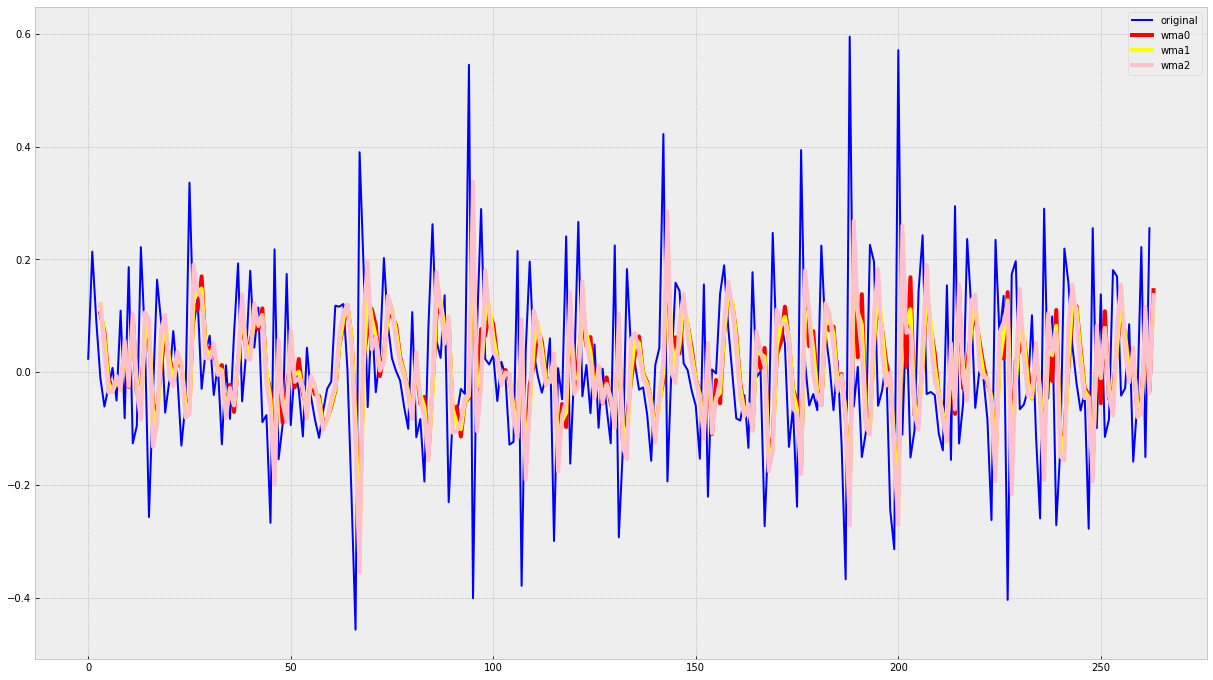

In [119]:
wma0_st = weighted_moving_average(autoreg_data_st, 3, [1, 1, 2])
wma1_st = weighted_moving_average(autoreg_data_st, 3,[1,2,3])
wma2_st = weighted_moving_average(autoreg_data_st, 3, [1, 4, 9])
with plt.style.context('bmh'):
    plt.figure(figsize=(21, 12))
    plt.plot(autoreg_data_st, color='blue',label='original')
    plt.plot(wma0_st, color='red',linewidth='4',label='wma0')
    plt.plot(wma1_st, color='yellow',linewidth='4',label='wma1')
    plt.plot(wma2_st, color='pink',linewidth='4',label='wma2')
    plt.legend()

Экспоненциальное сглаживание

In [121]:
def exponential_moving_average(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result)

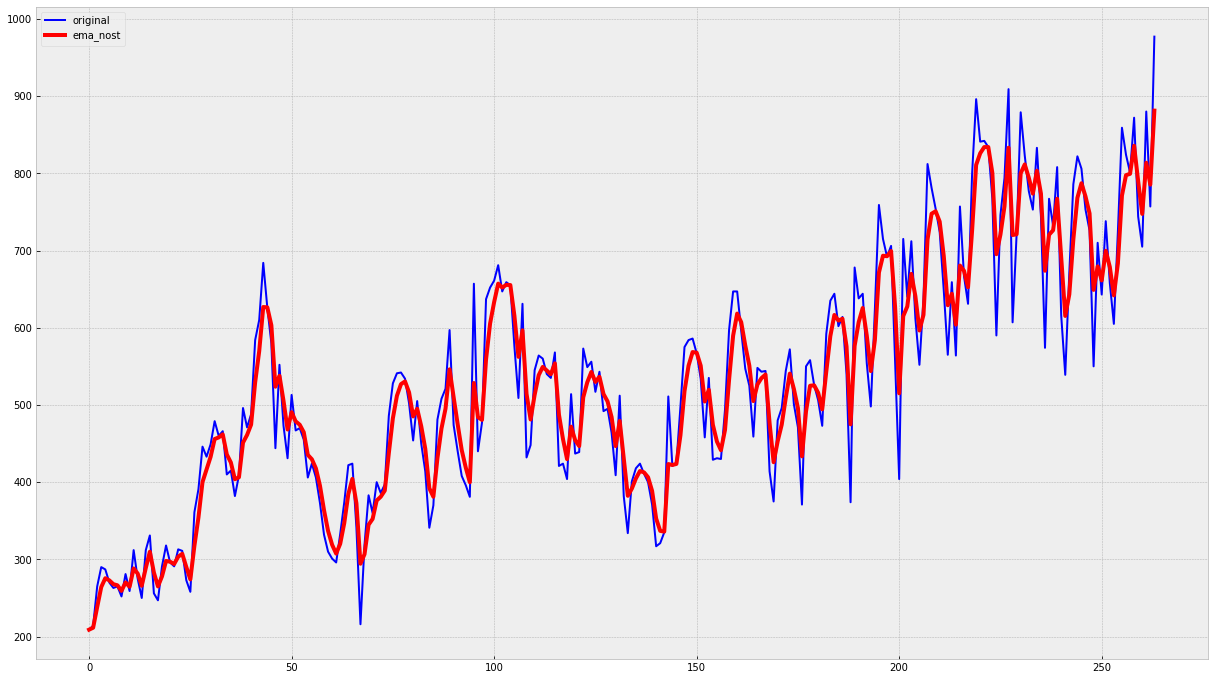

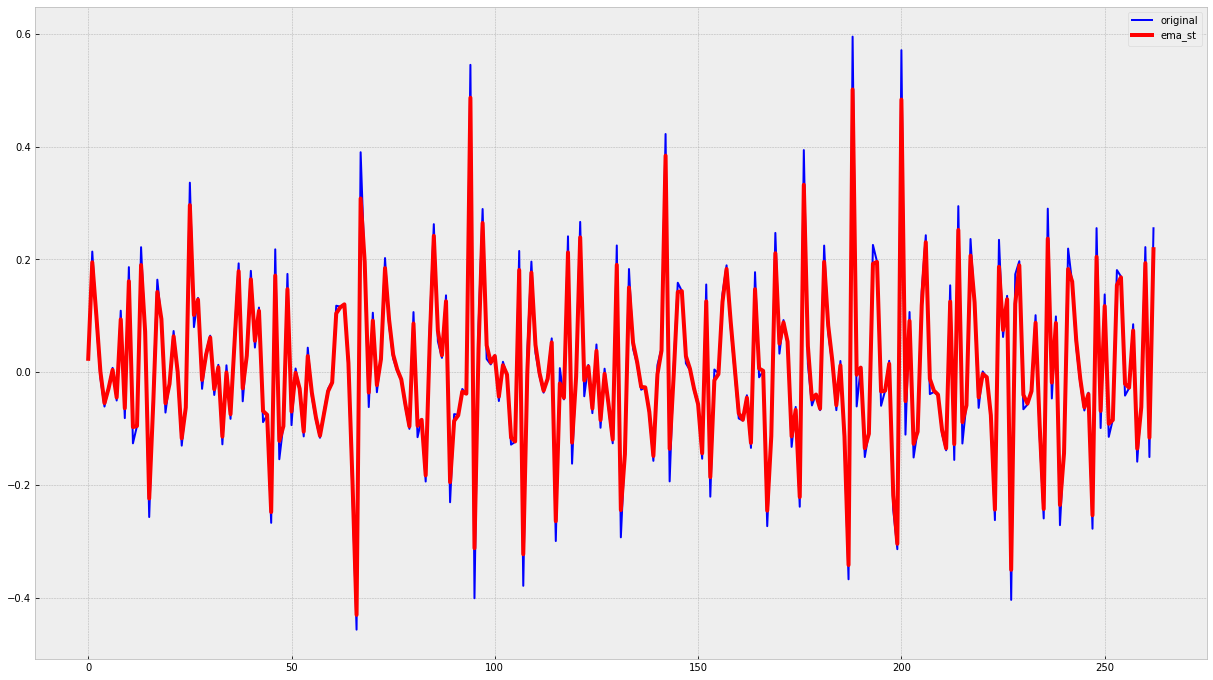

In [135]:
ema_0 = exponential_moving_average(autoreg_data_nost, 0.5)
ema_1 = exponential_moving_average(autoreg_data_st, 0.9)
with plt.style.context('bmh'):
    plt.figure(figsize=(21, 12))
    plt.plot(autoreg_data_nost, color='blue',label='original')
    plt.plot(ema_0, color='red',linewidth='4',label='ema_nost')
    plt.legend()
with plt.style.context('bmh'):
    plt.figure(figsize=(21, 12))
    plt.plot(autoreg_data_st, color='blue',label='original')
    plt.plot(ema_1, color='red',linewidth='4',label='ema_st')
    plt.legend()

Двойное экспоненциальное сглаживание

In [136]:
def double_ema(series, alpha, beta):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return pd.Series(result)
def plot_dema(alpha, beta,series):
    dema = double_ema(series, alpha, beta)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(series, color='blue',label='original')
        plt.plot(dema, color='red', linewidth='4', label='DEMA')
        plt.title("alpha={}, beta={}".format(alpha, beta))
        plt.legend()

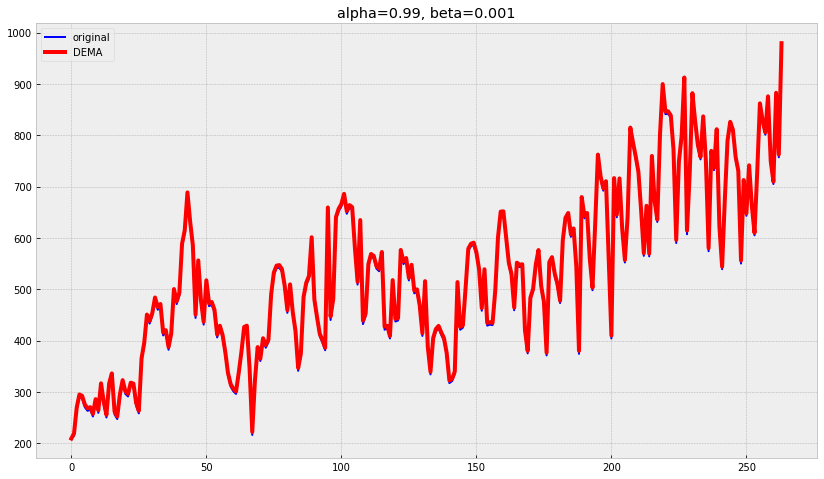

In [234]:
plot_dema(0.99,0.001,autoreg_data_nost)

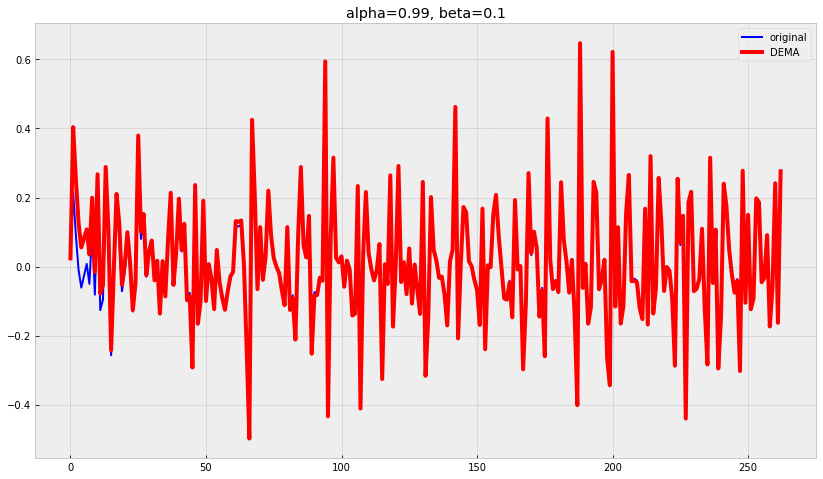

In [232]:
plot_dema(0.99,0.1,autoreg_data_st)

Хольт-Винтерс

In [247]:
def initial_trend(series, season_len):
    return sum([float(series[i + season_len] - series[i]) / season_len]) / season_len

def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

def plot_tema_nost(alpha, beta, gamma, ser=autoreg_data['Monthly U.S. auto registration (thousands) 1947 ? 1968'], ser_to_plot=autoreg_data['Monthly U.S. auto registration (thousands) 1947 ? 1968'], n_preds=24):
    tema = triple_exponential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser_to_plot, color='blue',label='original')
        plt.plot(tema, color='red', linewidth='4', label='TEMA_nost')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()
def plot_tema_st(alpha, beta, gamma, ser=autoreg_data_st, ser_to_plot=autoreg_data_st, n_preds=24):
    tema = triple_exponential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser_to_plot, color='blue',label='original')
        plt.plot(tema, color='red', linewidth='4', label='TEMA_st')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()

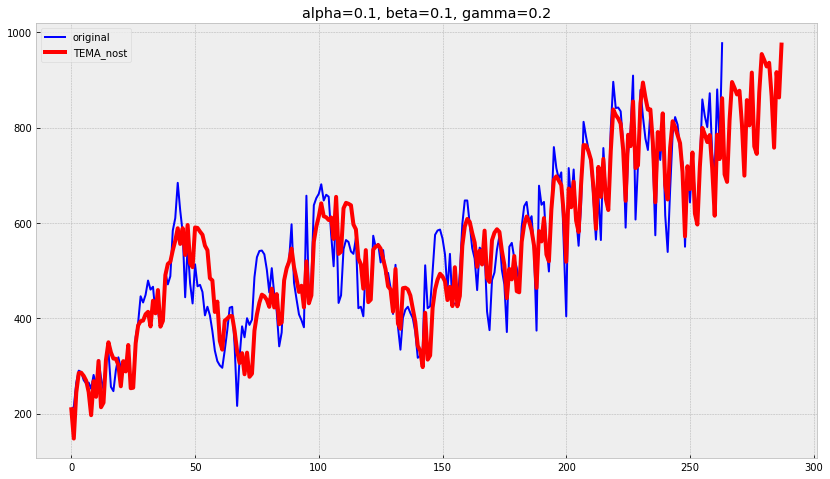

In [248]:
plot_tema_nost(0.1, 0.1, 0.2)

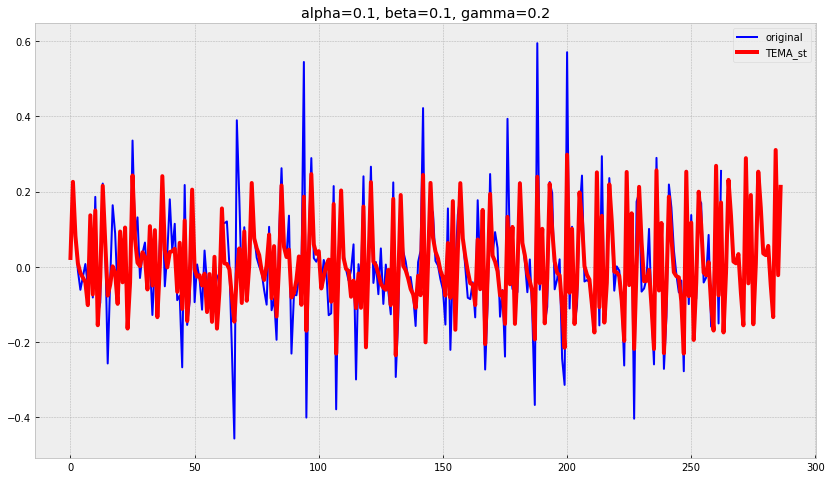

In [249]:
plot_tema_st(0.1, 0.1, 0.2)

In [250]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [265]:
series_nost = autoreg_data['Monthly U.S. auto registration (thousands) 1947 ? 1968']
series_st = autoreg_data_st

In [261]:
train1, test1, val1 = series_nost[:220], series_nost[220:240], series_nost[240:]
train2, test2, val2 = series_st[:220], series_st[220:240], series_st[240:]

In [266]:
def mse_nost(X):
    alpha, beta, gamma = X
    result = triple_exponential_smoothing(train1, 12, alpha, beta, gamma, len(test1))
    predictions = result[-len(test1):]
    error = mean_squared_error(predictions, test1)
    return error
def mse_st(X):
    alpha, beta, gamma = X
    result = triple_exponential_smoothing(train2, 12, alpha, beta, gamma, len(test2))
    predictions = result[-len(test2):]
    error = mean_squared_error(predictions, test2)
    return error

In [271]:
opt = minimize(mse_nost, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [272]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

      fun: 3200.1601521867833
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9.09494702e-05,  2.00727349e+05, -2.53934786e+02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 68
      nit: 7
   status: 0
  success: True
        x: array([0.61223445, 0.        , 1.        ])


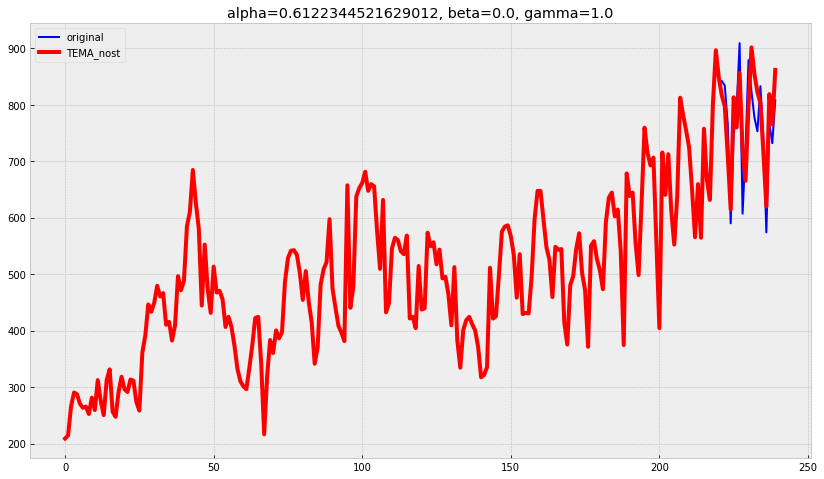

In [276]:
plot_tema_nost(alpha_opt, beta_opt, gamma_opt, ser=train1, ser_to_plot=series_nost[:240], n_preds=len(test1))

In [277]:
opt = minimize(mse_st, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [278]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

      fun: 0.010725376967850437
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.31800559e-06,  3.41813383e-05, -1.19348975e-07])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 92
      nit: 18
   status: 0
  success: True
        x: array([0.05793484, 0.00268464, 0.16986157])


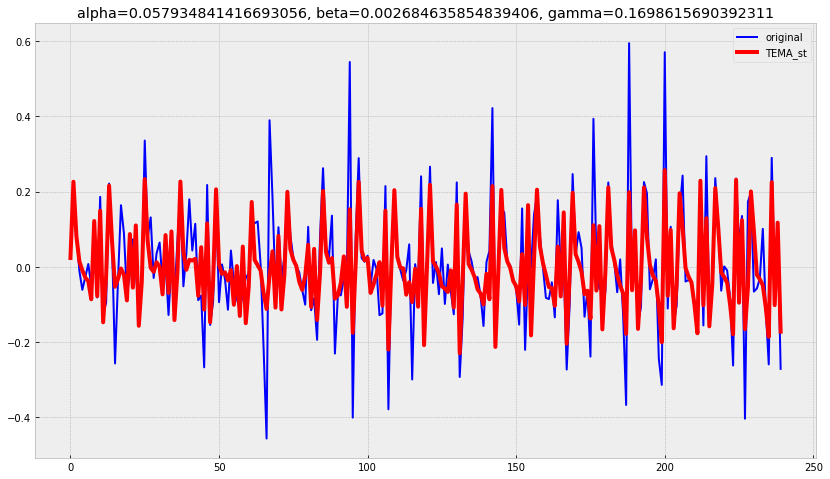

In [279]:
plot_tema_st(alpha_opt, beta_opt, gamma_opt, ser=train2, ser_to_plot=series_st[:240], n_preds=len(test2))

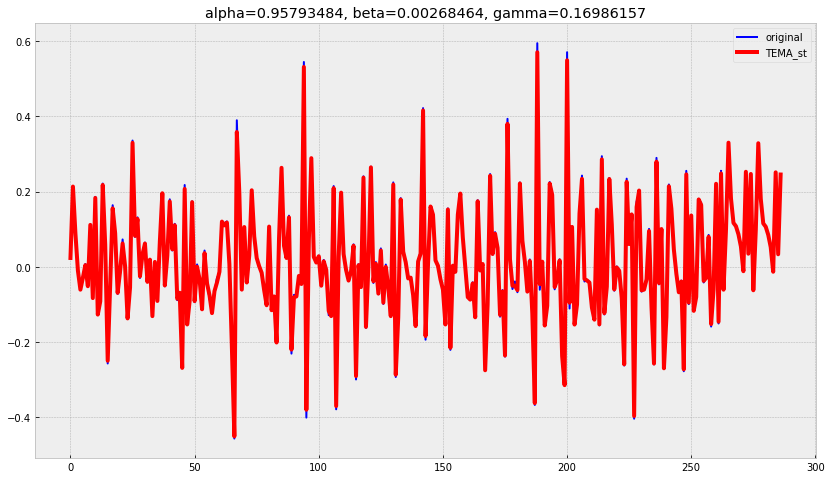

In [282]:
plot_tema_st(0.95793484, 0.00268464, 0.16986157)